# Predicting Building Energy Performance Using Architectural & Structural Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:/Data Science/Portfolio/datasets/ML/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240306.csv")

In [3]:
df.head()

,Report Year,"NYC Borough, Block and Lot (BBL)",City,Primary Property Type - Portfolio Manager-Calculated,Year Built,ENERGY STAR Score,Site Energy Use (kBtu),Weather Normalized Site Energy Use (kBtu),Total (Location-Based) GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Address 1
0,2022,1- 02090-0024,NEW YORK,Multifamily Housing,1909,34,3591399,3712495.1,265,31794.0,615 W 143RD STREET
1,2022,1-00002-0002,New York,Hotel,1900,Not Available,36220963.6,37279986.5,2243.4,193000.0,10 South Street
2,2022,1-00004-7501,New York,Office,1970,64,223447780.6,223455790.5,16458.5,2542563.0,1 Water Street
3,2022,1-00007-7501,New York,Multifamily Housing,1880,14,4211270.2,4293772.8,287.5,44907.0,66 Pearl Street
4,2022,1-00008-0044,NEW YORK,Data Center,1917,Not Available,31945520.8,32148605.3,2577.8,217034.0,104 BROAD ST


In [4]:
df.shape

(10974, 11)

In [5]:
df.isna().sum()

Report Year                                                0
NYC Borough, Block and Lot (BBL)                           0
City                                                       0
Primary Property Type - Portfolio Manager-Calculated       0
Year Built                                                 0
ENERGY STAR Score                                          0
Site Energy Use (kBtu)                                     0
Weather Normalized Site Energy Use (kBtu)                  0
Total (Location-Based) GHG Emissions (Metric Tons CO2e)    0
Property GFA - Self-Reported (ft²)                         0
Address 1                                                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10974 entries, 0 to 10973
Data columns (total 11 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Report Year                                              10974 non-null  int64  
 1   NYC Borough, Block and Lot (BBL)                         10974 non-null  object 
 2   City                                                     10974 non-null  object 
 3   Primary Property Type - Portfolio Manager-Calculated     10974 non-null  object 
 4   Year Built                                               10974 non-null  int64  
 5   ENERGY STAR Score                                        10974 non-null  object 
 6   Site Energy Use (kBtu)                                   10974 non-null  object 
 7   Weather Normalized Site Energy Use (kBtu)                10974 non-null  object 
 8   Total (Location-Based) GHG

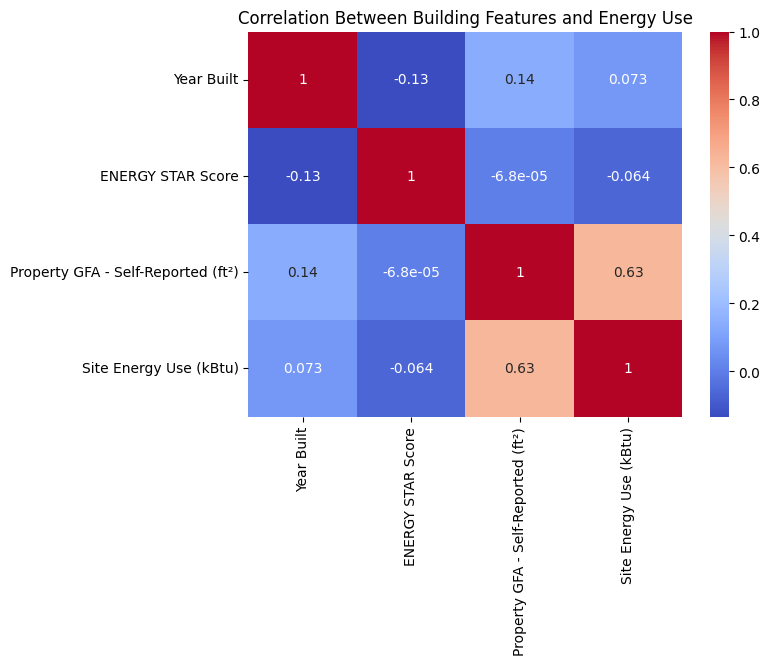

In [22]:
#Correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Year Built',
           'ENERGY STAR Score',
           'Property GFA - Self-Reported (ft²)',
           'Site Energy Use (kBtu)']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Building Features and Energy Use")
plt.show()

“The correlation heatmap shows that Gross Floor Area has the strongest positive correlation with Site Energy Use, while ENERGY STAR Score shows a negative correlation, indicating more efficient buildings consume less energy. Year Built has a weaker correlation, suggesting age alone is not a strong predictor without other factors.”

In [7]:
df["ENERGY STAR Score"] = pd.to_numeric(df["ENERGY STAR Score"],errors= "coerce")

In [8]:
df["ENERGY STAR Score"].head()

0    34.0
1     NaN
2    64.0
3    14.0
4     NaN
Name: ENERGY STAR Score, dtype: float64

In [9]:
##Fill null values
df["ENERGY STAR Score"] = df["ENERGY STAR Score"].fillna(df["ENERGY STAR Score"].median())

df['Year Built'] = pd.to_numeric(df['Year Built'], errors='coerce')
df['Year Built'] = df['Year Built'].fillna(df['Year Built'].median())

df['Property GFA - Self-Reported (ft²)'] = pd.to_numeric(df['Property GFA - Self-Reported (ft²)'], errors='coerce')
df['Property GFA - Self-Reported (ft²)'] = df['Property GFA - Self-Reported (ft²)'].fillna(df['Property GFA - Self-Reported (ft²)'].median())

In [10]:
# Convert target to numeric, replace 'Not Available' with NaN
df['Site Energy Use (kBtu)'] = pd.to_numeric(df['Site Energy Use (kBtu)'], errors='coerce')

# Drop rows where target is NaN
df = df.dropna(subset=['Site Energy Use (kBtu)'])

In [11]:
df["ENERGY STAR Score"].info()

<class 'pandas.core.series.Series'>
Index: 10663 entries, 0 to 10973
Series name: ENERGY STAR Score
Non-Null Count  Dtype  
--------------  -----  
10663 non-null  float64
dtypes: float64(1)
memory usage: 166.6 KB


In [12]:
# Converting categorical data to numerical through one hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Primary Property Type - Portfolio Manager-Calculated'] = le.fit_transform(df['Primary Property Type - Portfolio Manager-Calculated'])

In [13]:
features= ["Primary Property Type - Portfolio Manager-Calculated","Year Built","ENERGY STAR Score","Property GFA - Self-Reported (ft²)"]
target = "Site Energy Use (kBtu)"

In [14]:
df["Primary Property Type - Portfolio Manager-Calculated"].head()

0    26
1    17
2    29
3    26
4     8
Name: Primary Property Type - Portfolio Manager-Calculated, dtype: int64

In [15]:
X = df[features]
Y = df[target]

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.2)

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,random_state=42)
rf.fit(X_train,Y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [18]:
Y_pred = rf.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 6562901.643978486
RMSE: 69273202.52525422
R2 Score: 0.47185368231071523


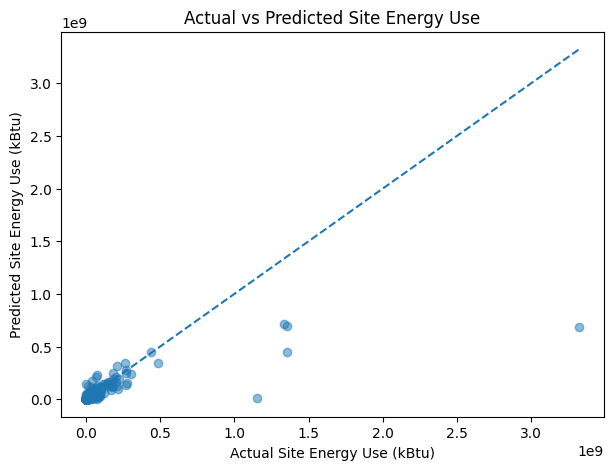

In [21]:
#Actual vs Predicted
plt.figure(figsize=(7,5))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         linestyle='--')

plt.xlabel("Actual Site Energy Use (kBtu)")
plt.ylabel("Predicted Site Energy Use (kBtu)")
plt.title("Actual vs Predicted Site Energy Use")
plt.show()

Most points are reasonably close to the line, showing the model captures the overall energy usage trend, though some high-energy buildings show larger errors.”

The Random Forest regression model achieved an R² score of 0.47 on unseen test data, indicating a moderate but meaningful ability to predict site energy use using architectural features.